In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df=pd.read_csv(r'C:\Users\Aytan\OneDrive\Desktop\Retail1.csv', encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-10 8:26,3.39,17850.0,United Kingdom


In [56]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [57]:
df.shape

(541909, 8)

In [58]:
#customer distribution by country
country_dist = df[['Country','CustomerID']].drop_duplicates()
country_dist.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending = False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [59]:
df=df.query("Country=='United Kingdom'").reset_index(drop=True)

In [60]:
df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [61]:
df=df[pd.notnull(df['CustomerID'])]

In [137]:
df.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

In [62]:
#negative values in Quantity column
df.Quantity.min()

-80995

In [63]:
##negative values in UnitPrice column
df.UnitPrice.min()

0.0

In [64]:
df=df[(df['Quantity']>0)]

In [65]:
#convert str to datetime
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [67]:
df['TotalAmount'] = df['Quantity']*df['UnitPrice']

In [68]:
df.shape

(354345, 9)

In [72]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [83]:
import datetime as dt

In [124]:
lastest_date=dt.datetime(2020,12,31)
RFMscores=df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (lastest_date-x.max()).days,'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})
RFMscores['InvoiceDate']=RFMscores['InvoiceDate'].astype(int)
RFMscores.rename(columns={'InvoiceDate': 'Recency',
                          'InvoiceNo': 'Frequency',
                           'TotalAmount': 'Monetary'
                          }, inplace=True)
RFMscores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,3634,1,77183.60
1,12747.0,3331,103,4196.01
2,12748.0,3313,4596,33719.73
3,12749.0,3331,199,4090.88
4,12820.0,3353,59,942.34


In [125]:
RFMscores.Recency.describe()

count    3921.000000
mean     3413.586585
std       115.044919
min      3308.000000
25%      3330.000000
50%      3369.000000
75%      3470.000000
max      4005.000000
Name: Recency, dtype: float64

c:\users\aytan\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


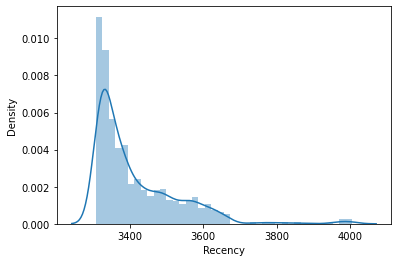

In [126]:
#recency distribution plot
import seaborn as sns
x=RFMscores['Recency']
ax=sns.distplot(x)

In [127]:
RFMscores.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

c:\users\aytan\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


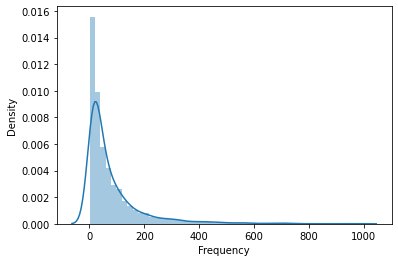

In [128]:
import seaborn as sns
x=RFMscores.query('Frequency<1000')['Frequency']
ax=sns.distplot(x)

In [129]:
RFMscores.Monetary.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

c:\users\aytan\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


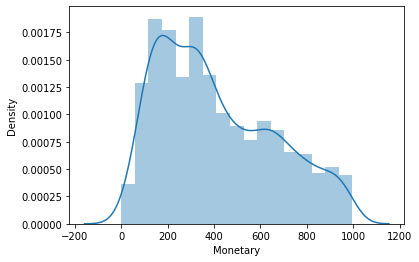

In [130]:
import seaborn as sns
x=RFMscores.query('Monetary<1000')['Monetary']
ax=sns.distplot(x)

In [131]:
quantiles=RFMscores.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 3330.0, 0.5: 3369.0, 0.75: 3470.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [132]:
#functions to create R F M segments
def Rscoring(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else: 
        return 4
def FnMscoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else: 
        return 1

In [133]:
RFMscores['R']=RFMscores['Recency'].apply(Rscoring, args=('Recency',quantiles,)) #The lower the recency value the better
RFMscores['F']=RFMscores['Frequency'].apply(FnMscoring, args=('Frequency',quantiles,))
RFMscores['M']=RFMscores['Monetary'].apply(FnMscoring, args=('Monetary',quantiles,))
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,3634,1,77183.60,4,4,1
12747.0,3331,103,4196.01,2,1,1
12748.0,3313,4596,33719.73,1,1,1
12749.0,3331,199,4090.88,2,1,1
12820.0,3353,59,942.34,2,2,2


In [138]:
#calculate and add rfm group value column showing combined concentated score of RFM
RFMscores['RFMgroup']=RFMscores.R.map(str)+RFMscores.F.map(str)+RFMscores.M.map(str)
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscore,RFM_Loyalty_level
CustomerID,,,,,,,,,
12346.0,3634,1,77183.60,4,4,1,441,9,Silver
12747.0,3331,103,4196.01,2,1,1,211,4,Plantium
12748.0,3313,4596,33719.73,1,1,1,111,3,Plantium
12749.0,3331,199,4090.88,2,1,1,211,4,Plantium
12820.0,3353,59,942.34,2,2,2,222,6,Gold


In [139]:
#loyality level for each customer
Loyalty_level=['Plantium','Gold','Silver','Bronze']
Score_cuts=pd.qcut(RFMscores.RFMscore, q=4, labels=Loyalty_level)
RFMscores['RFM_Loyalty_level']=Score_cuts.values
RFMscores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscore,RFM_Loyalty_level
0,12346.0,3634,1,77183.60,4,4,1,441,9,Silver
1,12747.0,3331,103,4196.01,2,1,1,211,4,Plantium
2,12748.0,3313,4596,33719.73,1,1,1,111,3,Plantium
3,12749.0,3331,199,4090.88,2,1,1,211,4,Plantium
4,12820.0,3353,59,942.34,2,2,2,222,6,Gold


In [140]:
RFMscores[RFMscores['RFMgroup']=='111'].sort_values('Monetary',ascending=False).reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscore,RFM_Loyalty_level
0,18102.0,3320,431,259657.30,1,1,1,111,3,Plantium
1,17450.0,3311,337,194550.79,1,1,1,111,3,Plantium
2,17511.0,3314,963,91062.38,1,1,1,111,3,Plantium
3,16684.0,3320,277,66653.56,1,1,1,111,3,Plantium
4,14096.0,3320,5111,65164.79,1,1,1,111,3,Plantium
